$y(x) = \sin(0.5 \cdot \ln (x)  \cdot x) + 1 \rightarrow min$ 

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fast')

def f(x):
    return math.sin(0.5 * math.log(x) * x) + 1

def draw(l = 0.01, r = 15, p = None):
    xx = np.arange(l, r, 0.05)
    yy = np.array([f(x) for x in xx])
    plt.plot(xx, yy)
    if p:
        plt.scatter(p, f(p), c = 'r')
        print(p)
    plt.show()

In [2]:
def dichotomous_search(l, r, eps, s = 1):
    delta = eps / 3
    
    while r - l > eps:
        m = (l + r) / 2
        x1 = m - delta
        x2 = m + delta
        if s * f(x1) > s * f(x2):
            l = x1
        else:
            r = x2
    return (l + r) / 2            

5.518083231608072


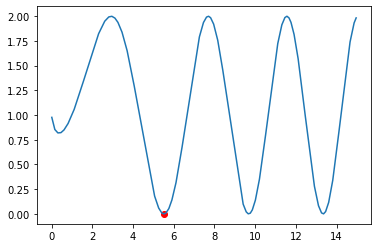

In [3]:
draw(p = dichotomous_search(2, 7, 0.001))

In [4]:
def golden_section_search(l, r, eps, s = 1):
    d = lambda: gr * (r - l)
    gr = (math.sqrt(5) - 1) / 2
    x1, x2 = r - d(), l + d()
    f1, f2 = f(x1), f(x2)
    
    while r - l > eps:
        if s * f1 > s * f2:
            l, x1, f1 = x1, x2, f2
            x2 = l + d()
            f2 = f(x2)
        else:
            r, x2, f2 = x2, x1, f1
            x1 = r - d()
            f1 = f(x1)
            
    return (l + r) / 2

5.517727512383281


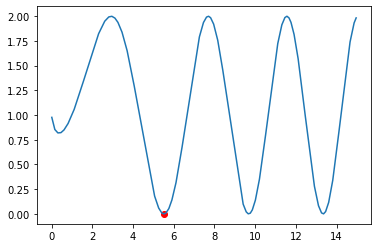

In [5]:
draw(p = golden_section_search(2, 7, 0.001))

In [6]:
def fibonacci_search(l, r, eps, s = 1):
    fib = np.array([1, 1])
    while fib[-1] <= (r - l) / eps:
        fib = np.append(fib, fib[-1] + fib[-2])

    d = lambda k: (r - l) * (fib[n - k] / fib[n - k + 1])
    n = len(fib) - 1
    x1, x2 = r - d(1), l + d(1)
    f1, f2 = f(x1), f(x2)
    
    for k in range(2, n):        
        if s * f1 > s * f2:
            l, x1, f1 = x1, x2, f2
            x2 = l + d(k)
            f2 = f(x2)
        else:
            r, x2, f2 = x2, x1, f1
            x1 = r - d(k)
            f1 = f(x1)
            
    return (l + r) / 2

5.51810790835181


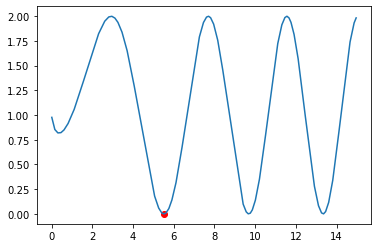

In [7]:
draw(p = fibonacci_search(2, 7, 0.001))

In [8]:
from scipy.interpolate import lagrange

def successive_parabolic_interpolation(l, m, r, eps, s = 1):
    xx = np.arange(l, r, 0.05)
    yy = np.array([f(x) for x in xx])
    paraboles = []
    f1, f2, f3 = f(l), f(m), f(r)

    # u must be in [l, r]
    assert s * f2 < s * f1 and s * f2 < s * f3, 'Must be s * f2 < s * f1, s * f2 < s * f3'
    while r - l > eps:
        p = ((m - l) ** 2) * (f2 - f3) - ((m - r) ** 2) * (f2 - f1)
        q = 2 * ((m - l) * (f2 - f3) - (m - r) * (f2 - f1))
        u = m - p / q
        fu = f(u)
        lagr = lagrange([l, m, r], [f1, f2, f3])
        paraboles.append(lagr(xx))
        if s * m > s * u:
            if s * f2 < s * fu:
                l, f1 = u, fu
            else:
                r, f3 = m, f2
                m, f2 = u, fu
        else:
            if s * f2 > s * fu:
                l, f1 = m, f2
                m, f2 = u, fu
            else:
                r, f3 = u, fu

    p = (l + r) / 2
    plt.scatter(p, f(p), c='r')
    for i in paraboles:
        plt.plot(xx, i, c='m', linestyle='--', alpha=.3)
    plt.plot(xx, yy)
    plt.show()
    return p

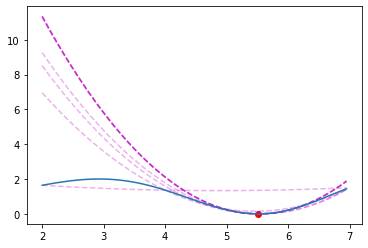

5.517981004523134


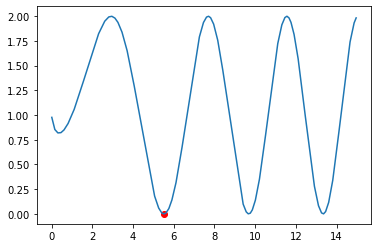

In [9]:
draw(p = successive_parabolic_interpolation(2, 4, 7, 0.001))

In [10]:
# with s = -1 can be mistakes
# need to pick (m, w, v) smarter ???

def brents_method(l, r, eps, s=1):
    gr = (math.sqrt(5) - 1) / 2
    m = w = v = (r + l) / 2
    fm = fw = fv = f(m)
    d = e = r - l
    u = float('+inf')

    while r - l > eps:
        g, e = e, d
    
        if m != w != v and fm != fw != fv:
            p = ((m - w) ** 2) * (fm - fw) - ((m - v) ** 2) * (fm - fv)
            q = 2 * ((m - w) * (fm - fw) - (m - v) * (fm - fv))
            u = m - p / q

        if l + eps <= u <= r - eps and abs(u - m) < g / 2:
            d = abs(u - m)
        else:
            if m < (r - l) / 2:
                d = r - m
                u = m + gr * d
            else:            
                d = m - l
                u = m - gr * d
        
        if abs(u - m) < eps:
            u = m + eps * ((u - m >= 0) - (u - m < 0))
        
        fu = f(u)

        if s * fu > s * fm:
            if s * u < s * m:
                l = m
            else:
                r = m
            
            if s * fu <= s * fw or w == m:
                v, w = w, u
                fv, fw = fw, fu
                
            elif s * fu <= s * fv or v == m or v == w:
                v = u
                fv = fu
        else:
            if s * u < s * m:
                r = m
            else:
                l = m

            v, w, m = w, m, u
            fv, fw, fm = fw, fm, fu
            
    return (l + r) / 2

5.51800000000034


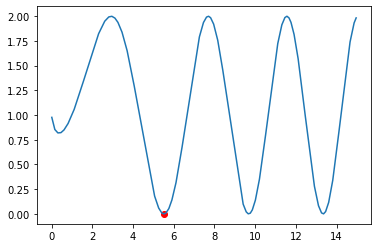

In [11]:
draw(p = brents_method(2, 7, 0.001, 1))